#1. Scrape Data

In [174]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
import requests

In [175]:

linkVec = []

for thisPage in [3]:#[2,3,4,5]:
    allLinkPage=requests.get("http://www.sirlinksalot.net/archives/thebachelor%d.html" % (thisPage))
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    rows = soup.find_all("a")
    for row in rows:
        rowString = str(row)
        checkASCII = [ord(letter) for letter in rowString]
        #print max(checkASCII),min(checkASCII)
        if max(checkASCII)<127 and min(checkASCII)>9:
        #    print max(checkASCII)<127 and min(checkASCII)>10
            thisLink = str(row.get("href"))
            if "sirlinksalot" not in thisLink: #remove internal links
                if "clickbank.net" not in thisLink: #remove ad links
                    if "pub43" not in thisLink: #remove ad links
                        if "bilbo" not in thisLink: #remove ad links
                            if "fastclick" not in thisLink: #remove ad links
                                if "casalemedia" not in thisLink: #remove ad links
                                    linkVec.append(thisLink)
                                


#cleaner = lambda r: [int(r[0].get_text()), r[1].get_text(), r[2].get_text(), r[2].find("a").get("href")]
#fields = ["ranking", "title", "band_singer", "url"]
#songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

In [176]:
print len(linkVec)

1753


In [177]:
#sort our vector to group similar website roots
linkVec = sorted(linkVec[0:20])

In [178]:
archivedLinkVec = []

count = 0;
length = len(linkVec)
for thisLink in linkVec:
    allLinkPage=requests.get("https://web.archive.org/web/*/" + thisLink)
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    if soup.find_all("div", attrs={"class": "date captures"}):
        row = soup.find_all("div", attrs={"class": "date captures"})[0]
        row = row.find("a").get("href")
        archivedLinkVec.append(str("https://web.archive.org" + row))
    count = count+1
    #print count, " out of ", length, " done"

In [179]:
#archivedLinkVec[0:40]
#https://web.archive.org/web/20130114020937/http://www.zap2it.com/news/pictures/zap-the-bachelor-meet-the-season-17-bachelorettes-20120925,0,7638604.photogallery?index=2

In [180]:
#we can assume that each article from the Examiner website will have similar HTML formatting. 
#So let us also note the root page.
rootPage = []
for link in archivedLinkVec:
    first = 50#link.find("www") 
    last = link.find(".com")+4
    rootPage.append(link[first:last])

In [181]:
#collect into a data frame
linkDF = pd.DataFrame()
linkDF['archived_link']=archivedLinkVec
linkDF['root_page']= rootPage


In [182]:
myGroups = linkDF.groupby('root_page')

In [183]:
count=0
for group in linkDF.root_page.unique():
    if group:
        count = count+1
        print group
print
print "There are",count, "unique groups."
    
#this shows that the number of unique websites whose formatting we need to learn is pretty limited.

blog.zap2it.com
insidetv.ew.com
www.digitalspy.com
www.eonline.com
www.examiner.com
www.people.com
www.usmagazine.com

There are 7 unique groups.


In [184]:
#SEASON 13 BLUE BACKGROUND
season13PicLinks=[]

for j in range(897,922):
    season13PicLinks.append("http://images.buddytv.com/btv_2_500311%d_1_590_-1_0_/meet-the-cast-of--th.jpg" % j)

In [185]:
#SEASON 14 BLUE BACKGROUND

season14Link = "http://www.realitytea.com/2009/12/17/meet-the-25-bachelorettes-of-the-bachelor-14-on-the-wings-of-love-photos/"
season14PicLinks = []
testPage=requests.get(season14Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-14" in row.get("src"):
            season14PicLinks.append(str(row.get("src")))

In [186]:
#SEASON 15 BLUE BACKGROUND
#all on one page --  yay!
season15Link = "http://www.realitytea.com/2010/12/21/photos-meet-the-25-bachelorettes-of-brad-womacks-the-bachelor-15/"
season15PicLinks = []
testPage=requests.get(season15Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-15" in row.get("src"):
            season15PicLinks.append(str(row.get("src")))

In [187]:
#SEASON 16 BLUE BACKGROUND
#all on one page --  yay!
season16Link = "http://www.realitytea.com/2011/12/12/photos-%E2%80%93-meet-the-25-bachelorettes-of-ben-flajnik%E2%80%99s-the-bachelor-season-16/"
season16PicLinks = []
testPage=requests.get(season16Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-16" in row.get("src"):
            season16PicLinks.append(str(row.get("src")))

In [188]:
#SEASON 17 BLUE BACKGROUND
season17PicLinks=[]
for i in range(2,9):
    season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-00%d/600" % i)
for j in range(10,29):
    season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-0%d/600" % j)

In [189]:
#SEASON 18 BLUE BACKGROUND
season18Links=[]
for k in range(71,98):
    season18Links.append("http://www.usmagazine.com/entertainment/pictures/the-bachelor-season-18-meet-juan-pablos-bachelorettes-2013412/343%d" % k)
season18PicLinks = []
for link in season18Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("img")
    for row in rows:
        if row.get("src"):
            if "18-meet-juan-pablos" in row.get("src"):
                season18PicLinks.append(str(row.get("src")))

In [190]:
#SEASON 19 BLUE BACKGROUND
season19Links=[]
nameBank = ["Whitney","Becca","Kaitlyn","Jade","Carly","Britt","Megan","Kelsey","Ashley-I","Mackenzie","Samantha","Ashley-S","Juelia","Nikki","Jillian","Amber","Tracy","Trina","Alissa","Jordan","Kimberly","Tandra","Tara","Amanda","Bo","Brittany","Kara","Michelle","Nicole","Reegan"]
season19Links.append("http://www.usmagazine.com/entertainment/pictures/bachelor-season-19-chris-soules-bachelorettes-2014412/42609")
for k in range(10,39):
    season19Links.append("http://www.usmagazine.com/entertainment/pictures/bachelor-season-19-chris-soules-bachelorettes-2014412/426%d"%k)
season19PicLinks = []
for link in season19Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("img")
    for row in rows:
        if row.get("src"):
            if "19-chris-soules-bachelorettes" in row.get("src"):
                season19PicLinks.append(str(row.get("src")))

In [191]:
#AGGREGATE PICS
allPicLinks = np.concatenate([season13PicLinks,season14PicLinks,season15PicLinks,season16PicLinks,season17PicLinks,season18PicLinks,season19PicLinks])
len(allPicLinks)

#might also be helpful: http://www.buddytv.com/tvshow/page/the-bachelor-cast-1.aspx

105

#2. Save links to local machine & Turn into NumPy Arrays

In [ ]:
import PIL
from PIL import Image

Uncomment this block if running for the first time.

In [192]:
#SAVE ALL PICS TO LOCAL MACHINE
#only really need to do this once
#make sure you're in the right folder on your local machine

#import urllib
#count = 0
#for link in allPicLinks:
#    urllib.urlretrieve(link, "bachelorette_pics/bachelorette%d.jpg" % count)
#    count = count+1

In [193]:
picsAsMatrices = []
viableIndices = np.concatenate([range(0,5),range(6,11),range(12,20),range(21,162)])
for count in viableIndices:
    picsAsMatrices.append(sp.misc.imread("bachelorette_pics/bachelorette%d.jpg" % count))

I don't think this next block is necessary.

In [195]:
#picsAsBinaryMatrices = []
#for count in viableIndices:
#    img = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
#    #img.save("greyscale_pics/greyscale%d.png" % count)
#    picsAsBinaryMatrices.append(img)

In [196]:
picsAsBinaryMatrices = []
#turn pics into B&W, then into (binary) numpy arrays
for count in viableIndices:
    img0 = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
    img0.save("greyscale_pics/greyscale%d.png" % count)
    img1 = np.array(img0.getdata())
    img2 = (img1[:,1]-img1[:,0]).reshape(img0.size[1], img0.size[0])
    picsAsBinaryMatrices.append(img2)

Test code

In [197]:
#plt.imshow(picsAsBinaryMatrices[156]);
#im1 = picsAsBinaryMatrices[15]
#im2 = picsAsBinaryMatrices[16]
#mat1 = np.array(im1.getdata())#.reshape(im1.size[0], im1.size[1], 2)
#mat11= (mat1[:,1]-mat1[:,0]).reshape(im1.size[1], im1.size[0])
#plt.imshow(mat11)

#heights,widths=[],[]
#for pic in picsAsBinaryMatrices:
#    heights.append(pic.size[0])
#    widths.append(pic.size[1])

I tried to use PIL but couldn't get eigenvalues, eigenvectors, etc. with it so I made my own.

In [198]:
#cropHeight = min(heights)
#cropWidth = min(widths)
#cropParams = [0,0,cropHeight,cropWidth]

#im1 = im1.crop(cropParams)
#im2 = im2.crop(cropParams)
#Image.blend(im1,im2,alpha=0.5)

#newIm = picsAsBinaryMatrices[0]
#newIm = newIm.crop(cropParams)
#for pic in picsAsBinaryMatrices:
#    tempPic = pic.crop(cropParams)
#    newIm = Image.blend(newIm,tempPic,alpha=0.25)

##test
#newIm = np.add(picsAsBinaryMatrices[0],picsAsBinaryMatrices[1])
#newIm = np.add(newIm,picsAsBinaryMatrices[4])
#plt.imshow(newIm)

#3. Registration

In [303]:
#REGISTRATION, using cross-correlation. 
from scipy import signal
from scipy import misc

Test code

In [1053]:
#decRate = 20
#sig0 = [[0,0,0],[0,1,0],[0,0,0]]
#sig1 = picsAsBinaryMatrices[0][85:135,125:175]
#sig2 = picsAsBinaryMatrices[1][80:130,100:150]
#decSig1 = sp.misc.imresize(sig1, decRate, interp='nearest', mode=None)
#decSig2 = sp.misc.imresize(sig2, decRate, interp='nearest', mode=None)
#xcorr = sp.signal.correlate2d(sig0,sig0, mode='full', boundary='symm')

#print xcorr
#print
#print xcorr.shape
#plt.imshow(xcorr);

#plt.imshow(decSig1)

#subset4= picsAsBinaryMatrices[testnum][50:(50+framesize),50:(50+framesize)]
#subset5= picsAsBinaryMatrices[refnum][50:(50+framesize),50:(50+framesize)]
#xcorr = sp.signal.correlate2d(picsAsBinaryMatrices[refnum],subset4, mode='same', boundary='symm')
#print (picsAsBinaryMatrices[refnum]).shape

#decimated = sp.misc.imresize(picsAsBinaryMatrices[0], 10, interp='bilinear', mode=None)
#plt.imshow(decimated)

In [1054]:
refnum = 6
testnum = 17
framesize = 150

In [1055]:
#mirror image borders
def mirror_image(im):
    im2 = np.concatenate((im[:,::-1],im),axis=1)
    im2 = np.concatenate((im2,im[:,::-1]),axis=1)
    mirrim = np.concatenate((im2,im2[::-1,:]),axis=0)
    mirrim = np.concatenate((im2[::-1,:],mirrim),axis=0)
    return mirrim

In [1052]:
#find index of max cross-correlation
#from http://stackoverflow.com/questions/21989513/finding-index-of-maximum-value-in-array-with-numpy
def nanargmax(a):
    idx = np.argmax(a, axis=None)
    multi_idx = np.unravel_index(idx, a.shape)
    if np.isnan(a[multi_idx]):
        nan_count = np.sum(np.isnan(a))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(a, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, a.shape)
    return multi_idx

minx,miny = xcorr.shape
optpix = nanargmax(xcorr[0:miny/2][0:minx/2]) #this would be the best way to translate the picture so it's aligned.

In [849]:
def crop_pic(im,optpx): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    fsz=0#110 #107 worked with ref 6 and num 4    
    #standard image size: (400, 267)
    px = optpx[1]-fsz
    py = optpx[0]-fsz
    x_std = im.shape[1]
    y_std = im.shape[0]
    print x_std+px,x_std*2+px
    print y_std+py,y_std*2+py
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std-px):(x_std*2-px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

Analysis goal: find eigenvalues & eigenvectors and then do PCA or something.

In [1023]:
def crop_to_min_size(im,minsz=(400,267)):
    
    oldszx,oldszy = im.shape
    newszx,newszy = minsz

    newx0,newy0 = 0,0
    newxf,newyf = minsz   
    if oldszx > newszx:
        newx0 = 0
        newxf = newx0 + newszx
    if oldszy > newszy:
        newy0 = (oldszy-newszy)/2
        newyf = newy0 + newszy    
    cropped = im[newx0:newxf,newy0:newyf]
    
    return cropped

In [1024]:
def crop_pic(im,optpx,fc): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    px = optpx[1]-fc[1]
    py = optpx[0]-fc[0]
    x_std = im.shape[1]
    y_std = im.shape[0]
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std+px):(x_std*2+px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

In [1025]:
def align_to_ref(imn,refn,fsz): #image number, ref number.

    myim = crop_to_min_size(picsAsBinaryMatrices[imn]) #make smallest size so can add all
    refim = picsAsBinaryMatrices[refn]
    
    fs = framesize; #frame size
    fc = fs/2,np.rint((myim.shape[1])/2) #frame center
    select_face = (fc[0]-fs/2),(fc[0]+fs/2),(fc[1]-fs/2),(fc[1]+fs/2)
    subset= myim[select_face[0]:select_face[1],select_face[2]:select_face[3]]
    xcorr = sp.signal.correlate2d(refim,subset, mode='same', boundary='symm') #takes time
    minx,miny = xcorr.shape
    optpix = nanargmax(xcorr[0:miny/2][0:minx/2]) #best way to translate the picture for alignment
    aligned_image = crop_pic(myim,optpix,fc)
    
    return aligned_image

##All the single ladies (All the single ladies)

Test code

In [1028]:
##you can see, by running this block, that we're actually doing something with the cross-correlation
##not all of the work was done heuristically in align_to_ref. nice.

#aligned = []
#for i in range(146,149):
#    aligned.append(align_to_ref(i,6,framesize))
#
#fig = plt.figure(figsize=(15,30))
#for a,j,i in zip(aligned,range(1,18),range(146,149)):
#    s=fig.add_subplot(5,4,j)
#    s.imshow(a+crop_to_min_size(picsAsBinaryMatrices[i]))

In [1029]:
#meanpic = np.mean([crop_to_min_size(a) for a in aligned], axis = 0)
#plt.imshow(meanpic)

This took my computer about 22 minutes.

In [1030]:
framesize = 200

import time

start = time.time()

alignedSet = []
for thisPic in range(0,len(picsAsBinaryMatrices)):
    #using image 6 as a reference because she is pretty centered in the frame
    alignedSet.append(align_to_ref(thisPic,6,framesize))
    print "Aligning image ", thisPic, " out of ", len(picsAsBinaryMatrices)
    
end = time.time()
print end - start

Aligning image  0  out of  159
Aligning image  1  out of  159
Aligning image  2  out of  159
Aligning image  3  out of  159
Aligning image  4  out of  159
Aligning image  5  out of  159
Aligning image  6  out of  159
Aligning image  7  out of  159
Aligning image  8  out of  159
Aligning image  9  out of  159
Aligning image  10  out of  159
Aligning image  11  out of  159
Aligning image  12  out of  159
Aligning image  13  out of  159
Aligning image  14  out of  159
Aligning image  15  out of  159
Aligning image  16  out of  159
Aligning image  17  out of  159
Aligning image  18  out of  159
Aligning image  19  out of  159
Aligning image  20  out of  159
Aligning image  21  out of  159
Aligning image  22  out of  159
Aligning image  23  out of  159
Aligning image  24  out of  159
Aligning image  25  out of  159
Aligning image  26  out of  159
Aligning image  27  out of  159
Aligning image  28  out of  159
Aligning image  29  out of  159
Aligning image  30  out of  159
Aligning image  31

#5. Save aligned images to local machine

In [1031]:
#for thisPic,count in zip(alignedSet,viableIndices):
#    np.save("aligned_pics/aligned%d" % count,thisPic) #saved as numpy arrays

Remove that one, too-small group shot.

In [1049]:
#find the groupshot
for thisPic,count in zip(alignedSet,range(0,len(alignedSet))):
    if thisPic.shape[0]<400:
        groupshot = count
        plt.imshow(thisPic)

#delete that groupshot
alignedSet = np.delete(alignedSet,groupshot)       
viableIndices = np.delete(viableIndices,groupshot)

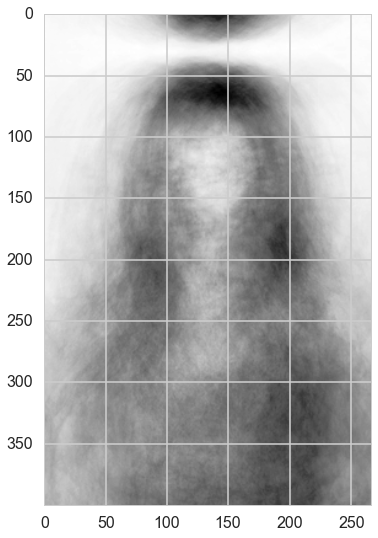

In [1050]:
alignedMean = np.mean(alignedSet)
plt.imshow(alignedMean)

In [1051]:
viableIndices

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  21,  22,  23,  24,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161])